In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# путь к папке с файлами
data_folder = r"C:\Users\Гребенников Матвей\Desktop\Диплом\Курсовая\MachineLearningCSV\MachineLearningCVE"


In [2]:
# Список файлов
file_list = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')]

# Объединяем файлы в один DataFrame
data = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)

print(f"Размер данных: {data.shape}")


Размер данных: (2830743, 79)


In [3]:
# Предполагаем, что последний столбец - метки классов, остальные - признаки
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Обработка NaN, Inf и слишком больших значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
X = X.astype(np.float32)  # Приводим данные к типу float32

# Проверка на корректность данных
print("Пропущенные значения:", X.isnull().sum().sum())


Пропущенные значения: 0


In [4]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")


Обучающая выборка: (1981520, 78), Тестовая выборка: (849223, 78)


In [5]:
# Инициализация и обучение модели
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Предсказания
y_pred = nb_model.predict(X_test)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.1403


In [6]:
# Печать отчета
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.05      0.09    681572
                       Bot       0.00      0.58      0.01       600
                      DDoS       0.41      0.84      0.55     38301
             DoS GoldenEye       0.09      0.85      0.17      3099
                  DoS Hulk       0.86      0.59      0.70     69516
          DoS Slowhttptest       0.11      0.59      0.18      1621
             DoS slowloris       0.02      0.52      0.04      1761
               FTP-Patator       0.01      0.98      0.02      2422
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.00      0.62      0.00         8
                  PortScan       0.05      0.07      0.06     47894
               SSH-Patator       0.01      0.99      0.02      1762
  Web Attack � Brute Force       0.00      0.06      0.01       472
Web Attack � Sql Injecti

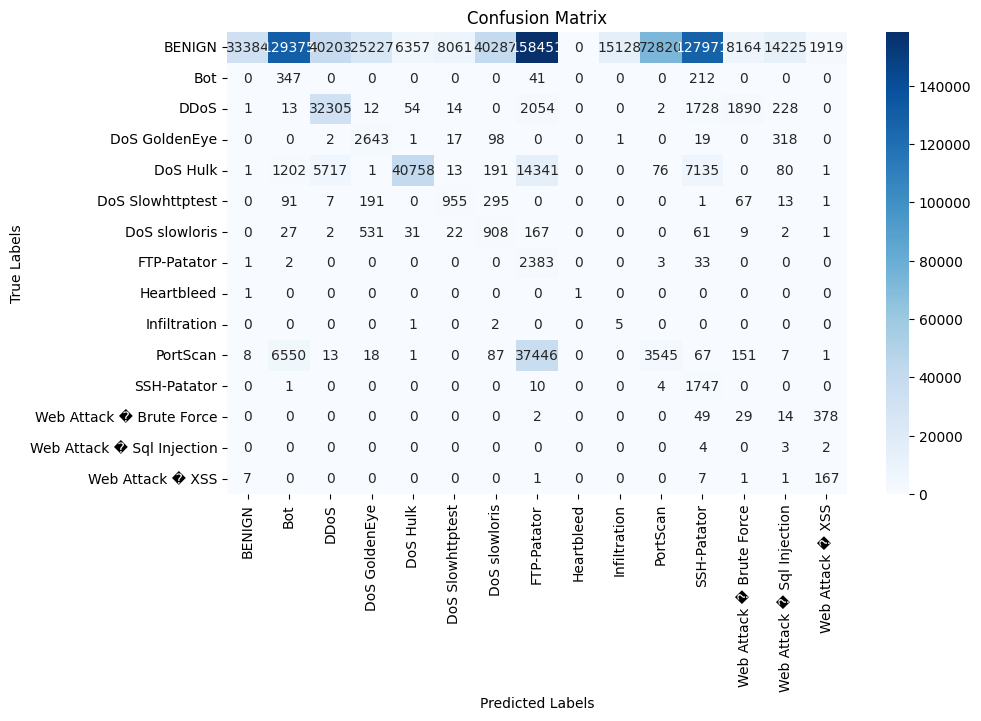

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


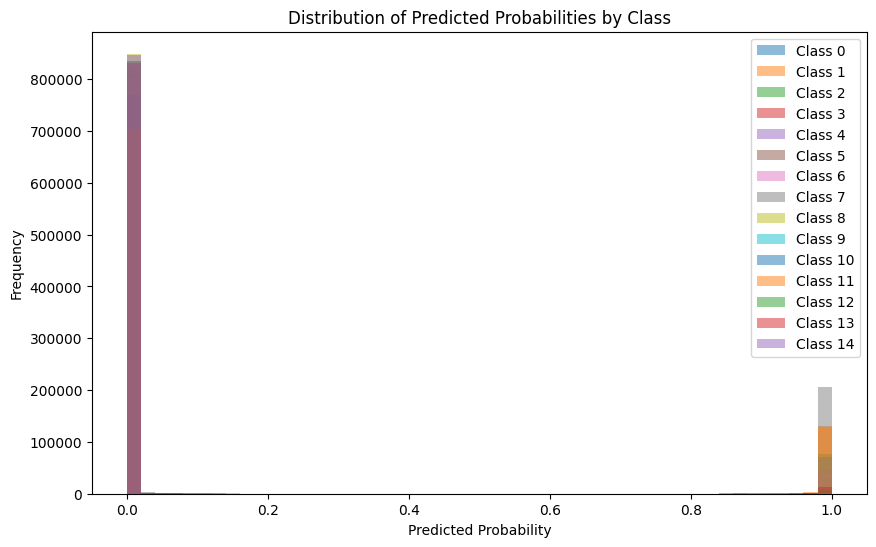

In [8]:
# Распределение вероятностей
probabilities = nb_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i, class_probs in enumerate(probabilities.T):
    plt.hist(class_probs, bins=50, alpha=0.5, label=f"Class {i}")
plt.title("Distribution of Predicted Probabilities by Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()
